# Brain Age Classification

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/'
import sys
sys.path.append(path_) 

In [2]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_cls = XGBoostClassifier()
Plotters = Plotter()

In [4]:
#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler=3

In [5]:
import pandas as pd

df_CN_results_ = pd.read_excel('results/df_results_test_regression_brain_age_50_90_years_CN.xlsx')


In [6]:
df_results_combined =df_CN_results_

# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['y_labels'].median()
df_results_combined['brain_age_class'] = df_results_combined['y_labels'].apply(lambda x: 1 if x > median_brain_age else 0)



C:\Users\felip\AppData\Local\Temp\ipykernel_115936\4061010663.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_combined['brain_age_class'] = df_results_combined['y_labels'].apply(lambda x: 1 if x > median_brain_age else 0)


In [7]:
df_results_combined

,ID-unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_ID,Sex,Educ,MMSE,GINI,ODQ,brain_age_class
0,27,55.0,66.693771,56.014999,11.693771,1.014999,CUB_123_2_sub-100035,2.0,13.0,30.0,40.700000,98.976304,0
1,55,62.0,70.470521,66.539794,8.470521,4.539794,CUB_123_1_sub-100012,2.0,13.0,30.0,40.700000,99.691591,0
2,111,68.0,67.683305,69.573763,-0.316695,1.573763,CUB_62_sub-100037,2.0,10.0,30.0,40.700000,95.638864,1
3,161,57.0,68.798409,60.093984,11.798409,3.093984,CUB_62_sub-100092,2.0,10.0,29.0,40.700000,97.391599,0
4,209,69.0,67.789624,70.638397,-1.210376,1.638397,ARG_B1_sub-10002,2.0,15.0,29.0,41.793333,99.483527,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,1383,74.0,66.469498,74.166210,-7.530502,0.166210,CHI_TAK_sub-100016,2.0,12.0,30.0,44.920000,98.650235,1
490,1384,57.0,65.787689,57.046377,8.787689,0.046377,CHI_TAK_sub-100017,2.0,17.0,30.0,44.920000,99.599221,0
491,1386,57.0,67.895384,59.135312,10.895384,2.135312,CHI_TAK_sub-100019,2.0,17.0,29.0,44.920000,99.641446,0
492,1387,69.0,68.008403,70.884464,-0.991597,1.884464,CHI_TAK_sub-100020,2.0,12.0,30.0,44.920000,98.420503,1


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold


X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI']]
y = df_results_combined['brain_age_class']
id = df_results_combined['ID-unique']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)


In [9]:
id

0        27
1        55
2       111
3       161
4       209
       ... 
489    1383
490    1384
491    1386
492    1387
493    1388
Name: ID-unique, Length: 494, dtype: int64

In [10]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=X_scaled, y=y, n_iter_=30, scoring_metric='accuracy')

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [11]:
import pickle

with open(f'results_model/opt_model_demographic_classification_brain_age_50_90_years_CN.pickle', 'wb') as file:
        pickle.dump(opt_model_cls, file)

In [8]:
import pickle
with open(f'results_model/opt_model_demographic_classification_brain_age_50_90_years_CN.pickle', 'rb') as file:
    opt_model_cls= pickle.load(file)

In [28]:
best_params_cls = opt_model_cls.best_params_

In [12]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(
        X=X,
        y=y,
        ID_label='ID-unique',
        ID=id,
        n_splits=10,
        n_iterations=20,
        params_=best_params_cls,
        scaler=Scaler
    )

c:\Users\felip\OneDrive - Universidad Técnica Federico Santa María\Documentos\Brain\Brain_Age_Clock\base_classifier.py:195: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
c:\Users\felip\OneDrive - Universidad Técnica Federico Santa María\Documentos\Brain\Brain_Age_Clock\base_classifier.py:197: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, tem

In [13]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Función para calcular métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # Calcular métricas de clasificación
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return {
        "AUC": auc(fpr, tpr),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
    }

# Lista de métricas por fold
metrics_per_fold_cls = [
    clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)


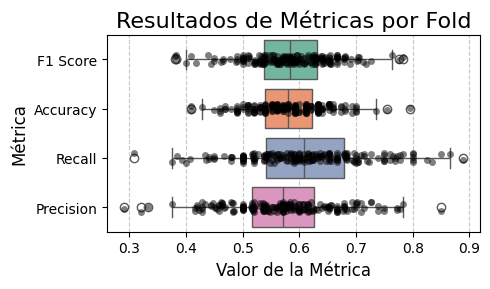

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame para las métricas de interés
metrics_df = pd.DataFrame({
    "F1 Score": metrics_["F1 Score"],
    "Accuracy": metrics_["Accuracy"],
    "Recall": metrics_["Recall"],
    "Precision": metrics_["Precision"]
})

# Configurar el gráfico
plt.figure(figsize=(5, 3))
sns.boxplot(data=metrics_df, orient="h", palette="Set2")
sns.stripplot(data=metrics_df, orient="h", color="black", alpha=0.5, jitter=True)

# Añadir detalles al gráfico
plt.title("Resultados de Métricas por Fold", fontsize=16)
plt.xlabel("Valor de la Métrica", fontsize=12)
plt.ylabel("Métrica", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def graph_roc(metrics_, title=''):
    """
    Genera un gráfico ROC con las métricas almacenadas en metrics_.
    """
    # Inicializar valores promedio
    metric_tpr_mean = np.zeros(100)
    auc_values = []
    acc_list, prec_list, f1_list, rec_list = [], [], [], []
    plt.figure(figsize=(4, 4))


    # Iterar sobre las métricas por fold
    for fold, auc_roc in enumerate(metrics_["AUC"]):
        if auc_roc < 0.75:  # Umbral para ignorar curvas con AUC < 0.75
            continue

        # Interpolación de TPR y cálculo de AUC
        tpr = np.interp(np.linspace(0, 1, 100), metrics_["FPR"][fold], metrics_["TPR"][fold])
        metric_tpr_mean += tpr
        auc_values.append(auc_roc)

        # Graficar cada curva individual
        plt.plot(
            np.linspace(0, 1, 100), tpr,
            color='#747E7E', alpha=0.5, lw=0.7,
            label=None if len(metrics_["AUC"]) > 1 else f'AUC = {auc_roc:.2f}'
        )

        # Agregar métricas de evaluación por fold
        acc_list.append(metrics_["Accuracy"][fold])
        prec_list.append(metrics_["Precision"][fold])
        f1_list.append(metrics_["F1 Score"][fold])
        rec_list.append(metrics_["Recall"][fold])

    # Graficar la curva promedio si hay suficientes curvas válidas
    if auc_values:
        metric_tpr_mean /= len(auc_values)
        plt.plot(
            np.linspace(0, 1, 100), metric_tpr_mean,
            color='#F24405', lw=2, alpha=0.8,
            label=f'Promedio (AUC = {np.mean(auc_values):.2f} ± {np.std(auc_values):.2f})'
        )

    # Línea de referencia
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)

    # Configuración de los ejes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

    # Título con métricas promedio
    plt.title(
        f'ROC Curve {title}\n'
        f'Acc = {np.mean(acc_list):.2f}, Prec = {np.mean(prec_list):.2f}, '
        f'F1 = {np.mean(f1_list):.2f}, Rec = {np.mean(rec_list):.2f}',
        fontsize=14
    )

    # Leyenda y mostrar gráfico
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


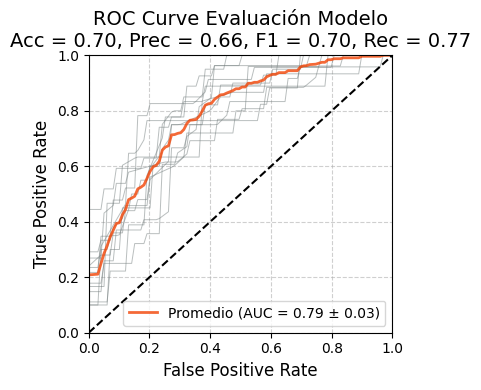

In [16]:
graph_roc(metrics_, title="Evaluación Modelo")


In [26]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []
temp_matrix = []

# Recorre los 200 modelos
for i in range(200):

    if metrics_["AUC"][i] < 0.0:  # Umbral para ignorar curvas con AUC < 0.75
            continue
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))
    temp_matrix.append(metrics_["Confusion Matrix"])

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)
    
# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase

#avg_conf_matrix = np.mean(np.array(metrics_["Confusion Matrix"]), axis=0)
avg_conf_matrix = np.mean(np.array(temp_matrix[0]), axis=0)

f_scores = [53.95, 227.805, 136.225, 201.925]
f_score_std = [6.515174594744182, 11.23018143219423, 8.332729144764036, 9.375999946672353]


In [27]:
avg_conf_matrix

array([[13.975, 11.225],
       [ 9.495, 14.705]])

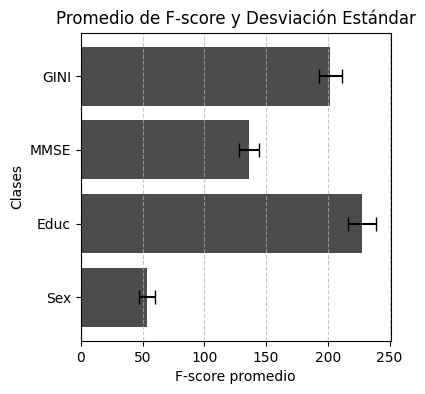

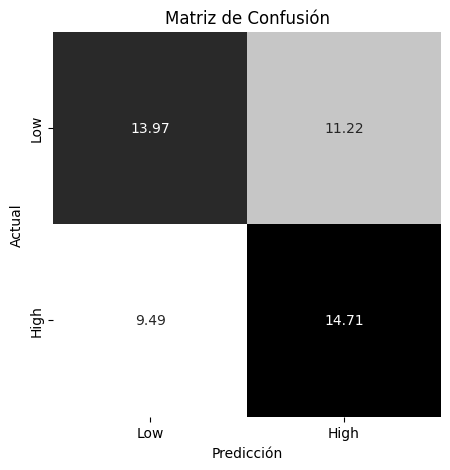

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
classes = ['Sex', 'Educ', 'MMSE', 'GINI']

# Datos de la matriz de confusión
conf_matrix = avg_conf_matrix

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(4, 4))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color='black', alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greys', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
